# End to End ML Projects  -- Diabetis Prediction

In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
data=pd.read_csv('dataset/diabetes.csv')

In [55]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [56]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [57]:
#here few misconception is there lke BMI can not be zero, BP can't be zero, glucose, insuline can't be zero so lets try to fix it
# now replacing zero values with the mean of the column
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())

""if we have a outliers how to fix it - median ""


""how came to know about the outliers are present or not"" 


""by ploting the graphs - that may be histogram, boxplot any other""


""we also make to scaled down the data which is long outliers to scaled down into small data""

<Axes: >

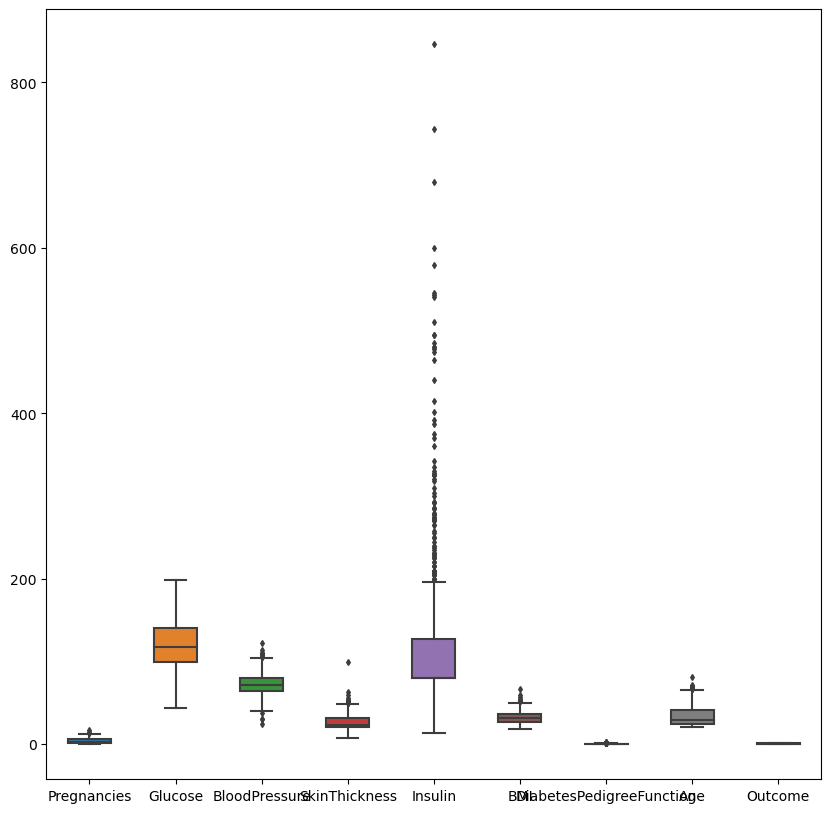

In [58]:
fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=data,width=0.5,ax=ax,fliersize=3)

Insulin have more outliers 

so we have to scaled down the data 

before that we have to initialise the data dependent and independent features



In [59]:
x=data.drop(columns=['Outcome'])
y=data['Outcome']

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [61]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

Then now we have to scaled down the data 

## These are the responsible for the standardisation of the data

In [62]:
import pickle 
def scaler_standard(x_train,x_test):
    scaler=StandardScaler()
    x_train_scaled=scaler.fit_transform(x_train)
    x_test_scaled=scaler.transform(x_test)
    
    file=open('models/standardscaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close
    
    return x_train_scaled,x_test_scaled

In [63]:
x_train_scaled,x_test_scaled=scaler_standard(x_train,x_test)

In [64]:
x_train_scaled

array([[ 1.51659096,  0.75976671,  0.63380049, ...,  0.83680677,
         0.52952571,  0.56793202],
       [ 1.81201827,  0.2347029 , -0.81497881, ...,  1.32103145,
        -0.06968859,  0.39844951],
       [ 0.92573636, -0.65134228,  0.15087406, ...,  0.73409244,
        -0.79424873,  0.99163829],
       ...,
       [ 2.69830017,  0.13625344,  1.43867788, ...,  1.64384791,
         0.36443605,  0.73741453],
       [ 0.03945446,  1.6129954 , -0.01010142, ...,  1.67319486,
         0.04648561, -0.61844554],
       [ 1.51659096, -0.65134228,  0.31184954, ...,  0.10313301,
         0.61512775,  1.07637954]])

In [65]:
x_test_scaled

array([[ 0.92573636,  0.46441832,  0.15087406, ..., -0.90933678,
         0.56009786,  1.50008581],
       [-0.84682744,  0.95666564, -0.97595429, ..., -0.8946633 ,
        -0.87067912, -0.95741055],
       [ 0.63030906, -0.42162686, -0.97595429, ..., -1.05607153,
        -0.78813429, -0.53370428],
       ...,
       [ 1.22116366,  2.1708757 ,  0.47282501, ...,  2.30415429,
        -0.99908218,  0.82215578],
       [ 0.33488176,  0.46441832,  0.79477597, ..., -0.03001731,
         0.53869735,  3.02542839],
       [ 0.03945446, -1.04514013, -0.2430757 , ..., -0.61586727,
         0.44698088, -0.19473927]])

# Logistic Regression


In [66]:
log_reg=LogisticRegression()

In [67]:
log_reg.fit(x_train_scaled,y_train)

LogisticRegression()

# Hyperparameter Tuning

## Gridsearchcv


In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
import numpy as np

In [70]:
import warnings

In [71]:
warnings.filterwarnings('ignore')

In [72]:
parameters={
            'penalty':['l1','l2'],
            'C':np.logspace(-3,3,10),
            'solver':['newton-sg','lbfgs','liblinear']
}

In [73]:
logreg=LogisticRegression()


In [74]:
clf=GridSearchCV(logreg,
                 param_grid=parameters,
                 scoring='accuracy',
                 cv=10)
clf.fit(x_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-sg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [75]:
clf.best_params_

{'C': 0.46415888336127775, 'penalty': 'l2', 'solver': 'liblinear'}

In [76]:
clf.best_score_

0.7719989423585404

Let's see how well our model

In [77]:
clf.fit(x_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-sg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [78]:
y_pred=clf.predict(x_test_scaled)

In [79]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [80]:
accuracy=accuracy_score(y_test,y_pred)

In [81]:
accuracy

0.7857142857142857

In [82]:
conf_mat=confusion_matrix(y_test,y_pred)

In [83]:
conf_mat

array([[88, 11],
       [22, 33]], dtype=int64)

In [84]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negetive=conf_mat[1][0]
true_negetive=conf_mat[1][1]

In [85]:
accuracy=(true_positive+true_negetive)/(true_positive+false_positive+false_negetive+true_negetive)

In [86]:
accuracy

0.7857142857142857

In [87]:
precision=(true_positive)/(true_positive+false_positive)

In [88]:
precision

0.8888888888888888

In [89]:
recall=(true_positive)/(true_positive+false_negetive)

In [90]:
recall

0.8

In [91]:
f1_score=2*(recall*precision)/(recall+precision)

In [92]:
f1_score

0.8421052631578948

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        99
           1       0.75      0.60      0.67        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



In [94]:
print(accuracy_score(y_test,y_pred))

0.7857142857142857


In [95]:
print(confusion_matrix(y_test,y_pred))

[[88 11]
 [22 33]]


In [96]:
import pickle
file=open('models/modelforprediction.pkl','wb')
pickle.dump(log_reg,file)
file.close()